In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.io as pio
pio.renderers.default = "svg"
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:

df = pd.read_csv('Fuel_states.csv')
data2= pd.read_csv('Fuel_states.csv')
df.head()

,state,capital,subsidy,road tax,petrol,diesel,EV
0,Andhra Pradesh,Amaravati,0,1.0,111.70,99.32,54000
1,Arunachal Pradesh,Itanagar,5000,0.0,95.39,84.57,20
2,Assam,Dispur,10000,1.0,97.78,89.81,64766
3,Bihar,Patna,10000,1.0,108.30,95.02,83335
4,Chhattisgarh,Raipur,5000,0.0,102.46,95.44,20966


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     36 non-null     object 
 1   capital   36 non-null     object 
 2   subsidy   36 non-null     int64  
 3   road tax  36 non-null     float64
 4   petrol    36 non-null     float64
 5   diesel    36 non-null     float64
 6   EV        36 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.1+ KB


,subsidy,road tax,petrol,diesel,EV
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,3250.000000,0.492778,100.478611,90.709167,41179.055556
std,3682.972402,0.486994,5.963835,5.098102,64668.960119
min,0.000000,0.000000,84.100000,79.740000,20.000000
25%,0.000000,0.000000,96.735000,87.475000,508.750000
50%,2000.000000,0.500000,98.255000,89.995000,18888.500000
75%,5000.000000,1.000000,105.010000,94.900000,50075.250000
max,10000.000000,1.000000,111.700000,102.750000,337180.000000


In [4]:
df.isnull().sum()

state       0
capital     0
subsidy     0
road tax    0
petrol      0
diesel      0
EV          0
dtype: int64

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     36 non-null     object 
 1   capital   36 non-null     object 
 2   subsidy   36 non-null     int64  
 3   road tax  36 non-null     float64
 4   petrol    36 non-null     float64
 5   diesel    36 non-null     float64
 6   EV        36 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.1+ KB


,subsidy,road tax,petrol,diesel,EV
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,3250.000000,0.492778,100.478611,90.709167,41179.055556
std,3682.972402,0.486994,5.963835,5.098102,64668.960119
min,0.000000,0.000000,84.100000,79.740000,20.000000
25%,0.000000,0.000000,96.735000,87.475000,508.750000
50%,2000.000000,0.500000,98.255000,89.995000,18888.500000
75%,5000.000000,1.000000,105.010000,94.900000,50075.250000
max,10000.000000,1.000000,111.700000,102.750000,337180.000000


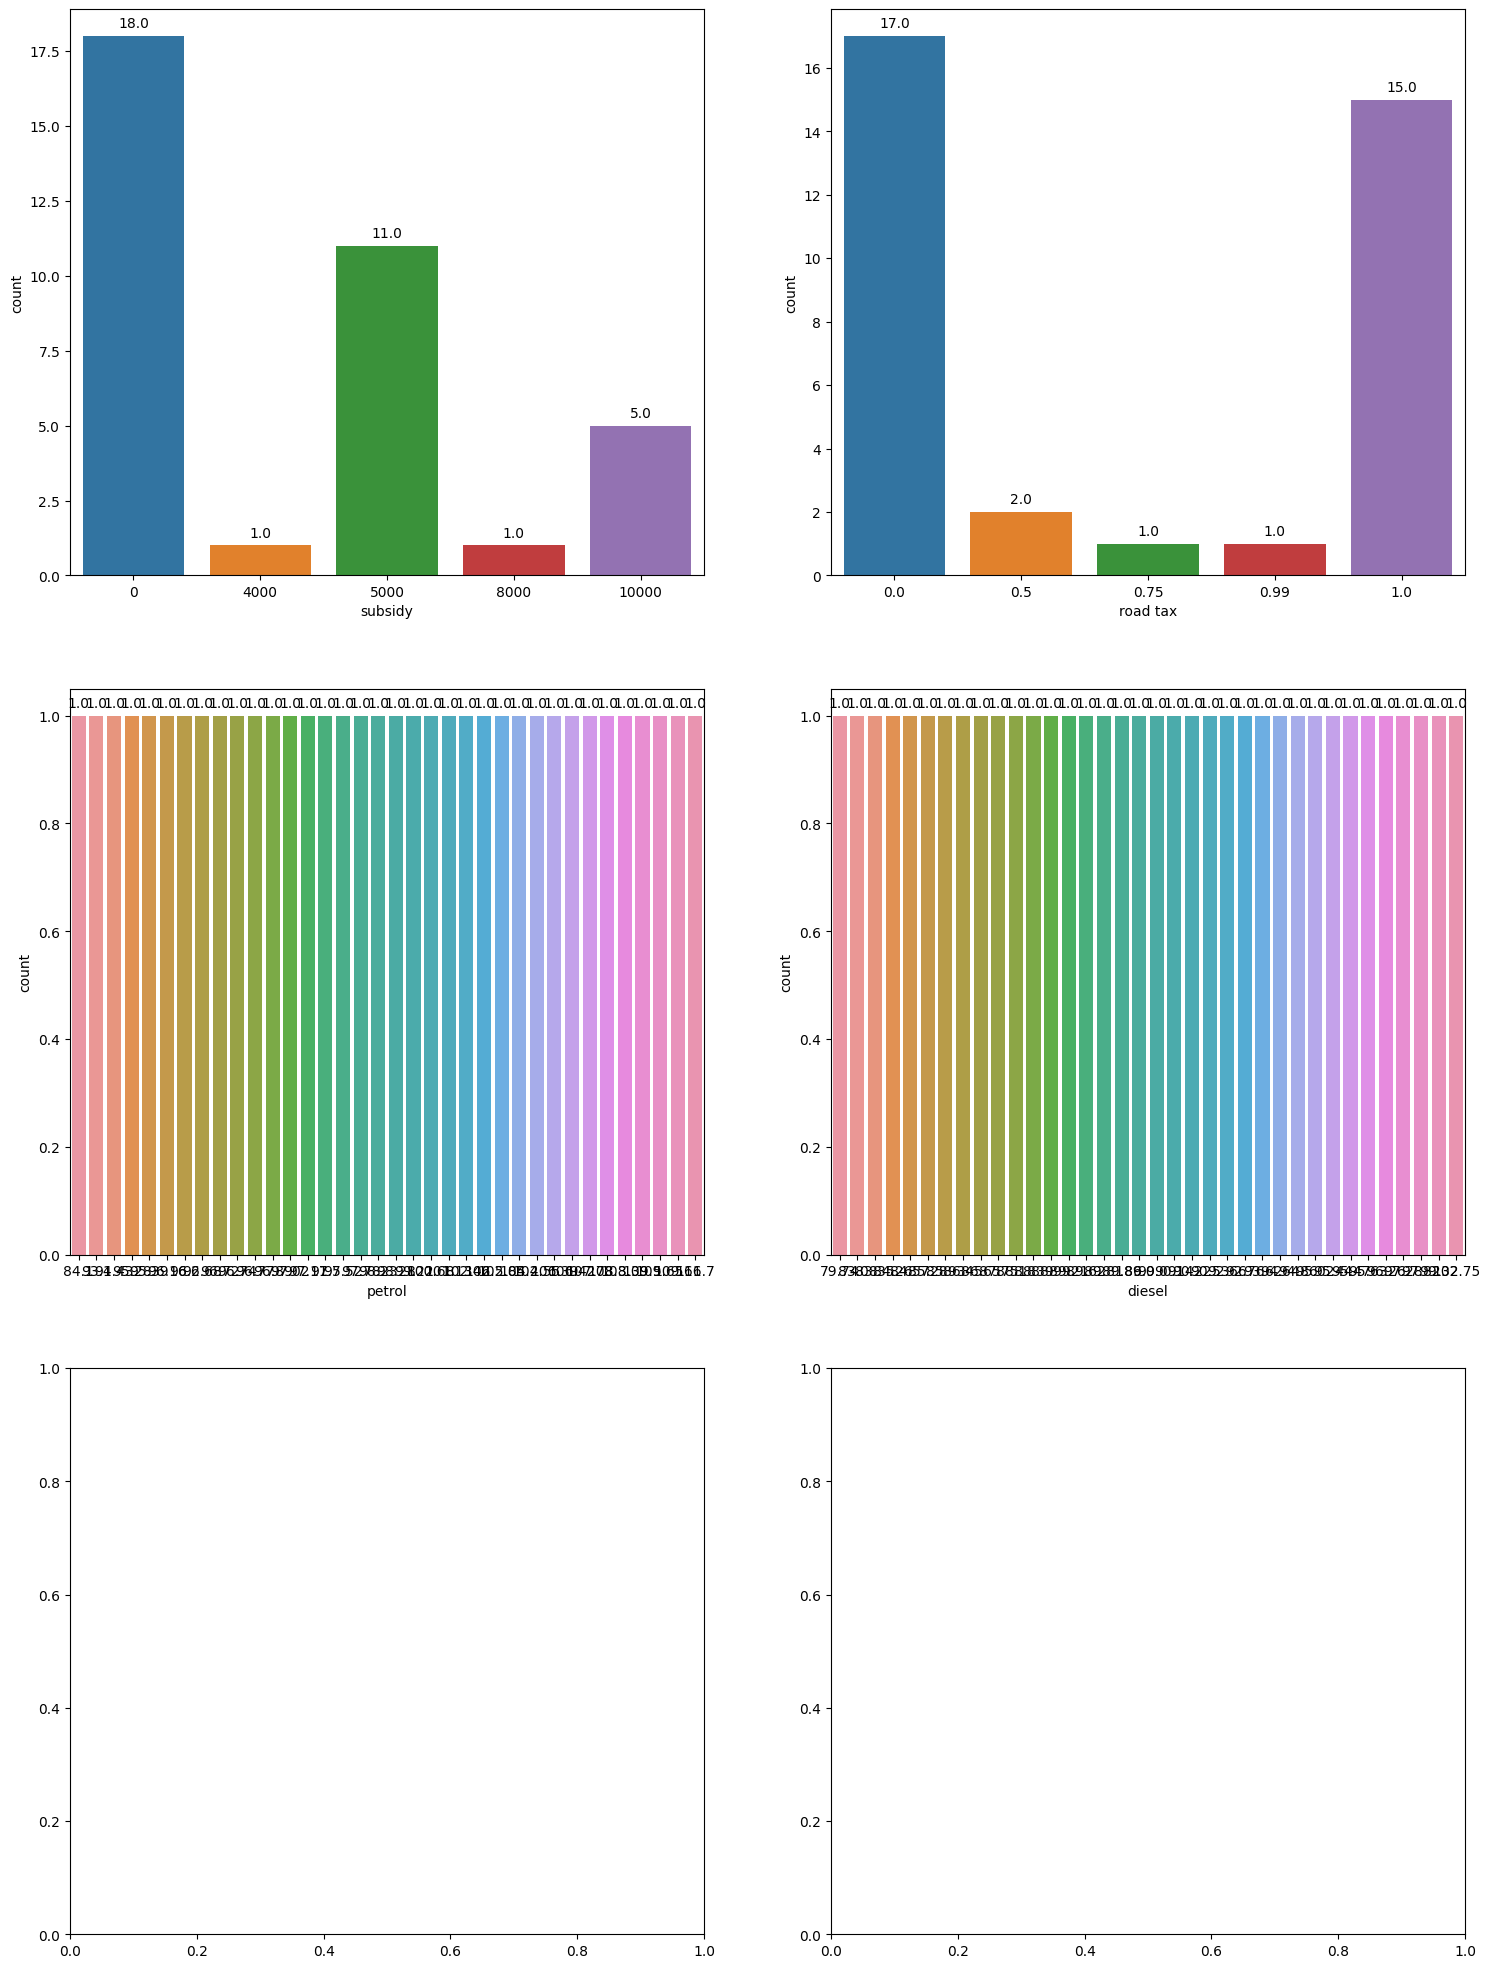

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))
columns = ['subsidy','road tax','petrol','diesel']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    splot = sns.countplot(data=df, x=column, ax=axes[row][col])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

In [7]:
corr_matrix = df.corr()
#to get each and every correlation of variables
print(corr_matrix)

           subsidy  road tax    petrol    diesel        EV
subsidy   1.000000  0.228513 -0.124860 -0.093633  0.006280
road tax  0.228513  1.000000  0.226831  0.238052  0.387749
petrol   -0.124860  0.226831  1.000000  0.745220  0.103568
diesel   -0.093633  0.238052  0.745220  1.000000  0.199831
EV        0.006280  0.387749  0.103568  0.199831  1.000000


Pairplot of all the columns based on Rapid Charger presence

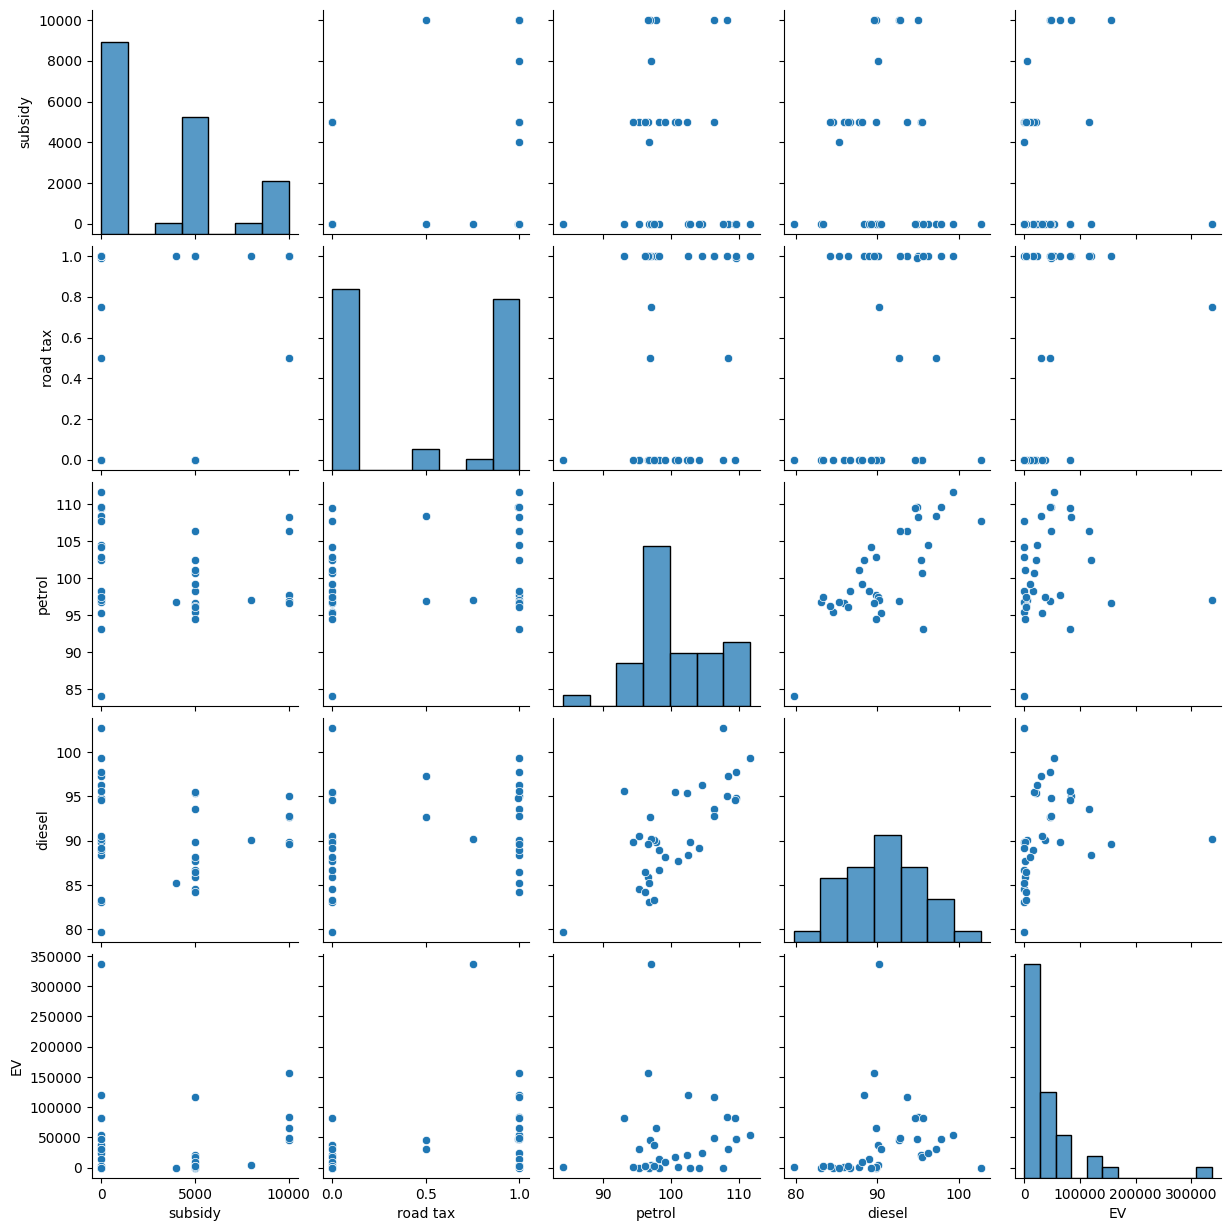

In [8]:
df.isnull().sum() #missing values ..... no missing values
# provides all the data relationship between each variable
sns.pairplot(df[['subsidy','road tax','petrol','diesel','EV']])
plt.show()

Plotting state vs each variable

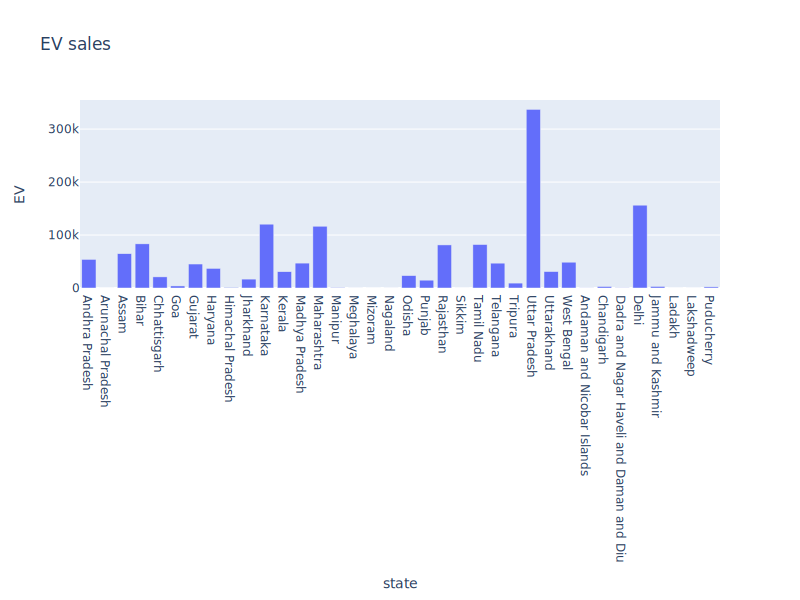

In [9]:
fig = px.bar(df,x='state',y = 'EV',title = 'EV sales',labels = {'x':'State','y':'sales'})
fig.update_layout(width=800, height=600)
pio.show(fig)

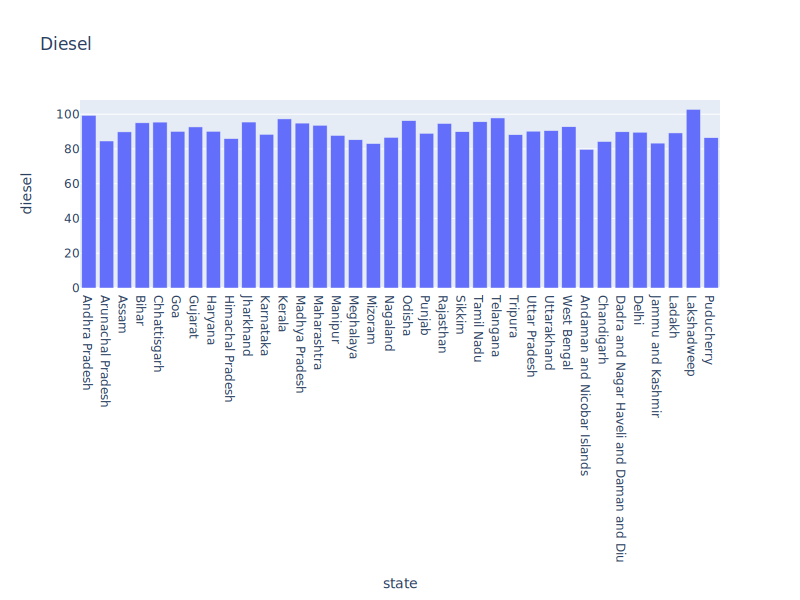

In [10]:
fig = px.bar(df,x='state',y = 'diesel',title = 'Diesel',labels = {'x':'State','y':'diesel'})
fig.update_layout(width=800, height=600)
pio.show(fig)

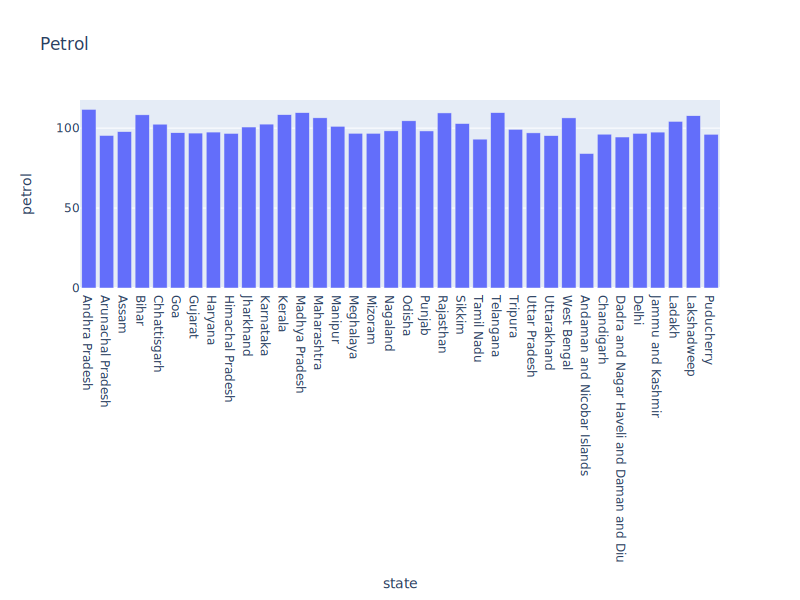

In [11]:
fig = px.bar(df,x='state',y = 'petrol',title = 'Petrol',labels = {'x':'State','y':'petrol'})
fig.update_layout(width=800, height=600)
pio.show(fig)

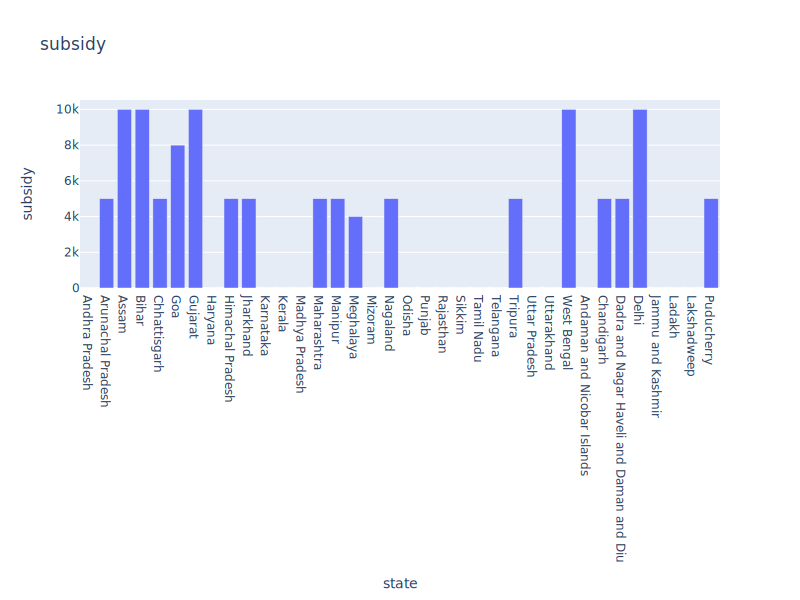

In [12]:
fig = px.bar(df,x='state',y = 'subsidy',title = 'subsidy',labels = {'x':'State','y':'subsidy'})
fig.update_layout(width=800, height=600)
pio.show(fig)

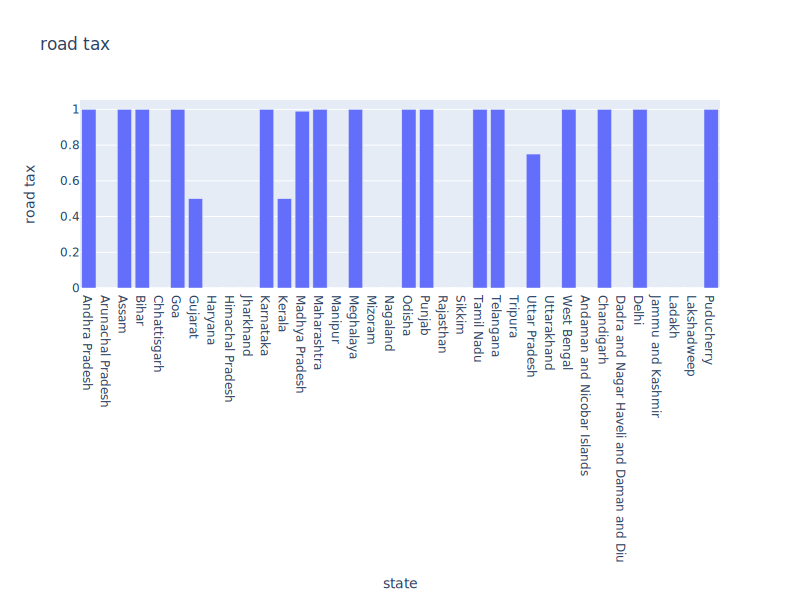

In [13]:
fig = px.bar(df,x='state',y = 'road tax',title = 'road tax',labels = {'x':'State','y':'road tax'})
fig.update_layout(width=800, height=600)
pio.show(fig)

Heatmap

<Axes: >

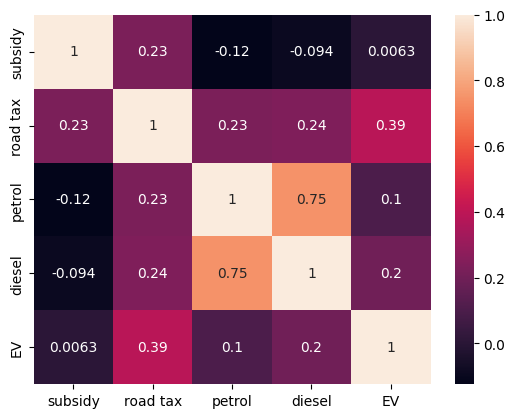

In [14]:
sns.heatmap(df.corr(),annot=True)

Checking the models that fit this dataset

In [15]:
#LINEAR REGRESSION 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data into a DataFrame
data = data2

# Define the independent and dependent variables
X = data[['subsidy', 'road tax', 'petrol', 'diesel']]
y = data['EV']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate the R-squared value
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R-squared: {r2:.2f}')


R-squared: 0.18


linear regression and OLS model isnt a good fit

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score


# Define the independent and dependent variables
X = data[['subsidy', 'road tax', 'petrol', 'diesel']]
y = data['EV']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X).fit()

# Make predictions and calculate the R-squared value
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R-squared: {r2:.2f}')


R-squared: 0.18


Fitting the Model and calculating the accuracy

Logistic regression

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data[['subsidy', 'road tax', 'petrol', 'diesel']]

# Define the dependent variable as binary by thresholding at the median value
threshold = data['EV'].median()
y = (data['EV'] > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy:.2f}')


Test accuracy: 0.62


 DecisionTreeRegressor and logistic regression is a better fit

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Define the independent and dependent variables
X = data[['subsidy', 'road tax', 'petrol', 'diesel']]
y = data['EV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model on the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R-squared: {r2:.2f}')

# Display the feature importances
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature}: {importance:.2f}')

R-squared: 0.68
subsidy: 0.03
road tax: 0.04
petrol: 0.39
diesel: 0.54


The subsidy and petrol variables have lower importance values, indicating that they are less important in predicting the target variable

Ridge method

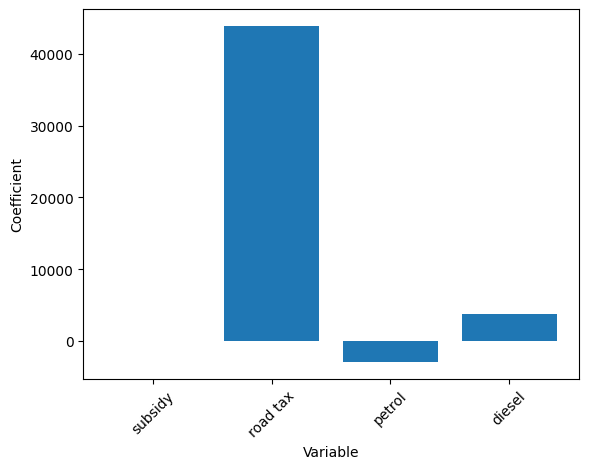

In [19]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Define the independent and dependent variables
X = data[['subsidy', 'road tax', 'petrol', 'diesel']]
y = data['EV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model on the training data
model = Ridge()
model.fit(X_train, y_train)

# Make predictions on the test data and calculate the mean squared error
y_pred = model.predict(X_test)
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.show()


Step 2

In [20]:
columns = ['subsidy', 'road tax', 'petrol', 'diesel']
values = df[columns].values.astype(int)
pca = PCA()
pca.fit_transform(values)

for column, std, var, cum_var in zip(columns, pca.components_.std(axis=0), pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()):
    print(f"column: {column} \nStandard Deviation: {std} \nProportion of Variance: {var} \nCumulative Proportion: {cum_var} \n")

column: subsidy 
Standard Deviation: 0.4330581203427614 
Proportion of Variance: 0.9999955765705717 
Cumulative Proportion: 0.9999955765705717 

column: road tax 
Standard Deviation: 0.43475874936193243 
Proportion of Variance: 3.857444244249544e-06 
Cumulative Proportion: 0.999999434014816 

column: petrol 
Standard Deviation: 0.35274028865554846 
Proportion of Variance: 5.496995496554675e-07 
Cumulative Proportion: 0.9999999837143656 

column: diesel 
Standard Deviation: 0.4990188203040474 
Proportion of Variance: 1.6285634446706625e-08 
Cumulative Proportion: 1.0 



In [21]:
df2=pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)
df2

,PC1,PC2,PC3,PC4
subsidy,1.000000,-0.000243,-0.000030,-0.000042
road tax,0.000038,-0.013175,0.001028,0.999913
petrol,-0.000207,-0.771085,-0.636661,-0.009505
diesel,-0.000132,-0.636596,0.771143,-0.009181


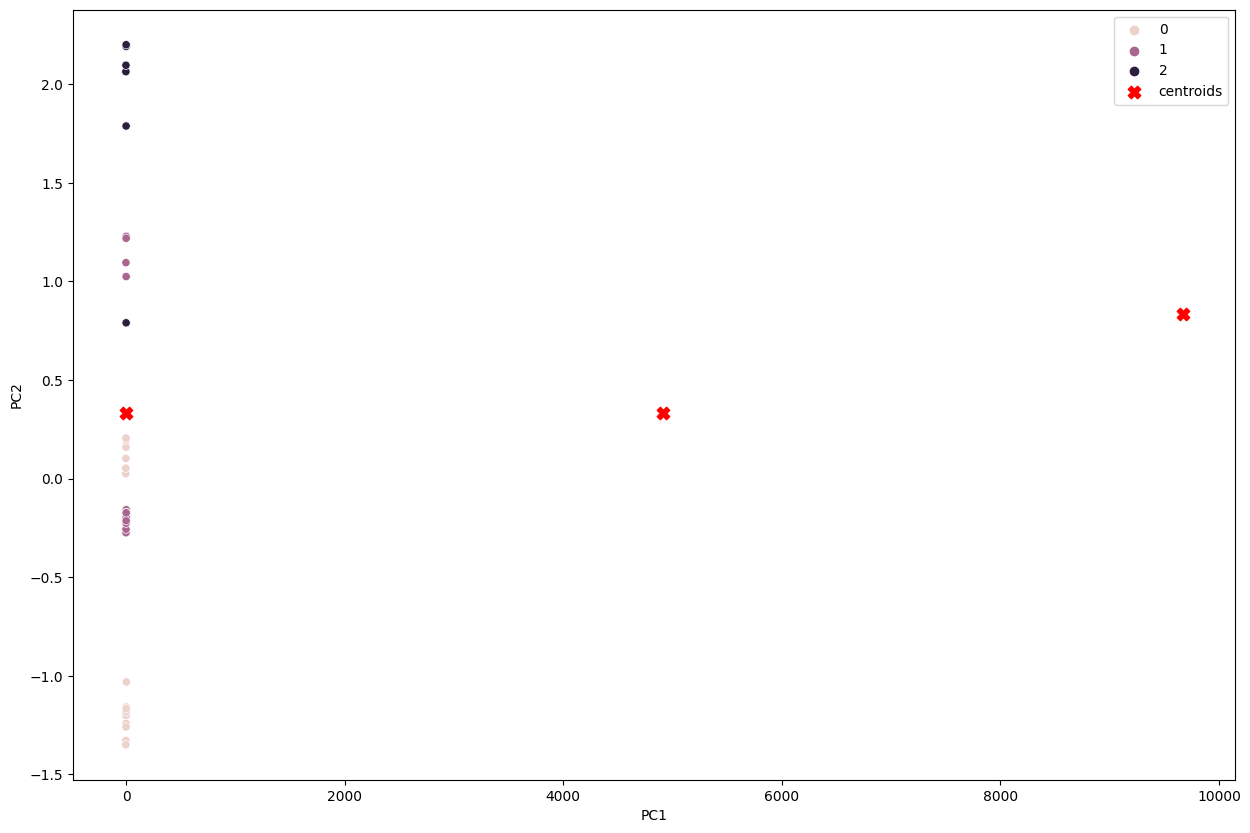

In [22]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(3, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca.n_components)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

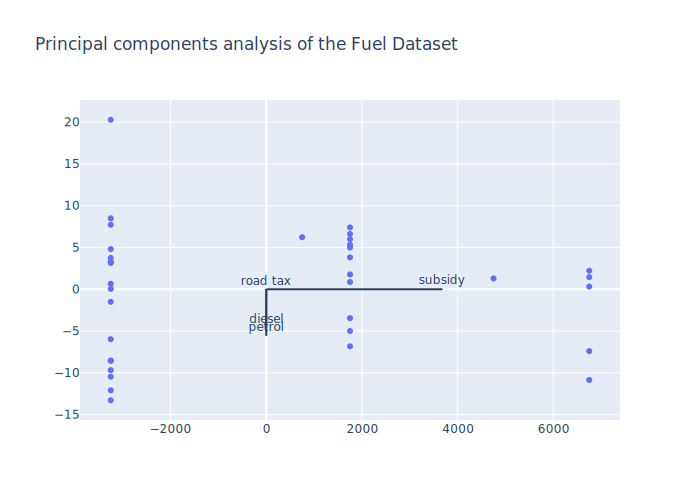

In [23]:
import plotly.graph_objs as go

pca = PCA()
components = pca.fit_transform(values)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=components[:, 0], y=components[:, 1], mode='markers'))
fig.update_layout(title='Principal components analysis of the Fuel Dataset')

for loading, feature in zip(loadings, columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loading[0],
        y1=loading[1]
    )
    fig.add_annotation(
        x=loading[0],
        y=loading[1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()



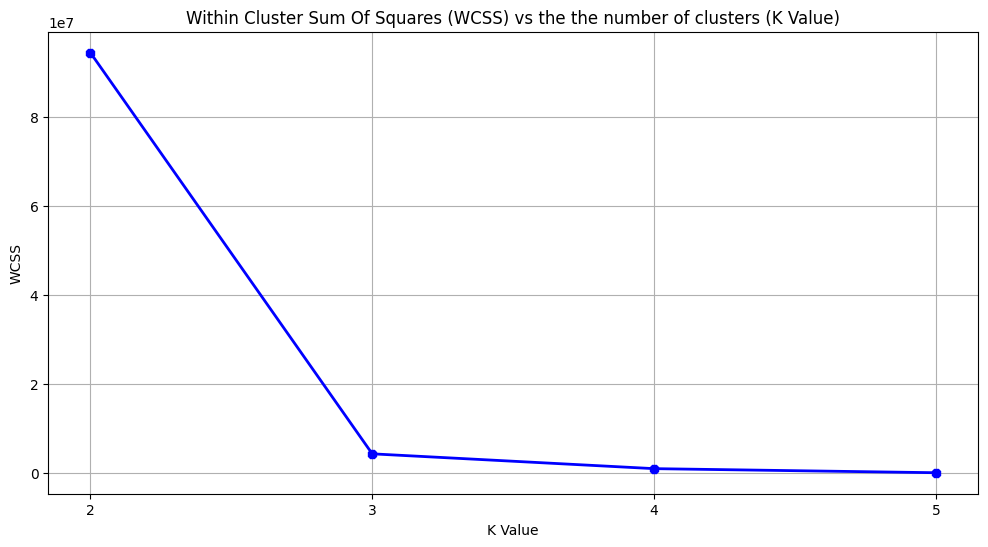

In [24]:
wcss = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(2, 6), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.xticks(range(2, 6))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()


We observe an elbow at k=3

Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.8151544081803538
For n_clusters = 3 The average silhouette_score is : 0.9564219217350642
For n_clusters = 4 The average silhouette_score is : 0.953681752488043
For n_clusters = 5 The average silhouette_score is : 0.9403966838662077


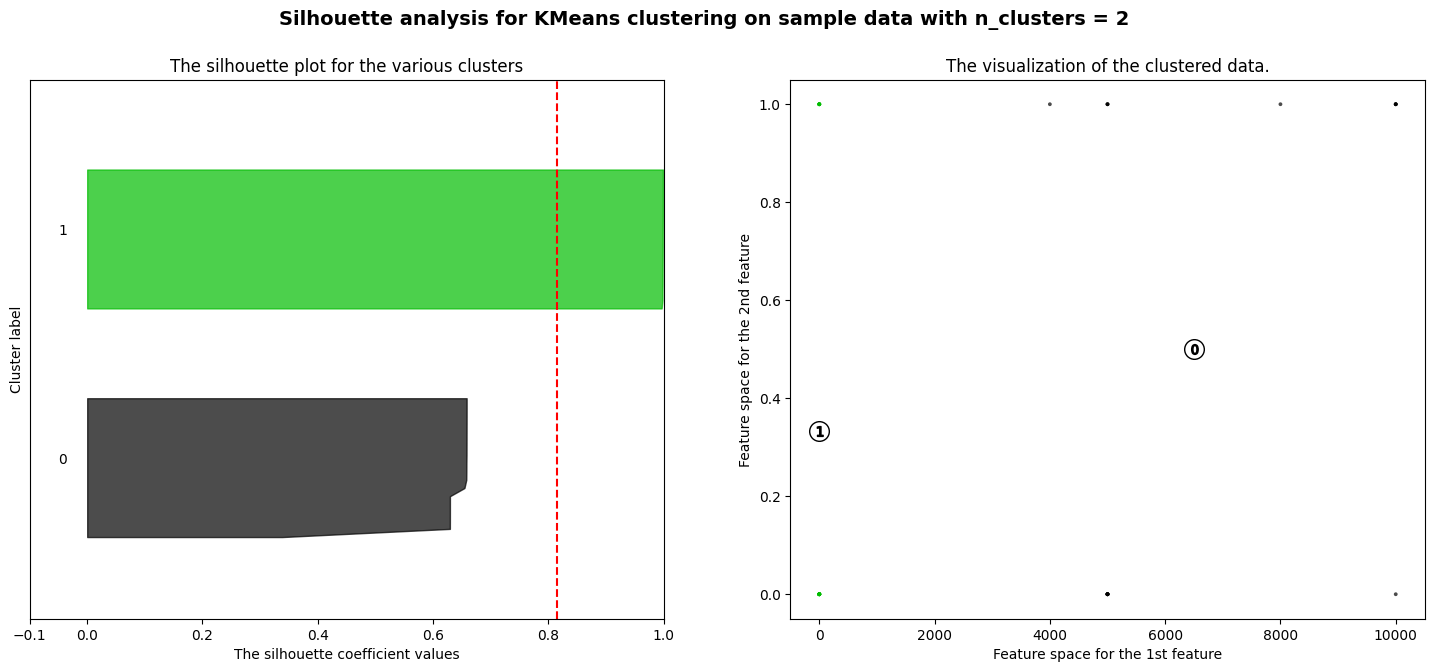

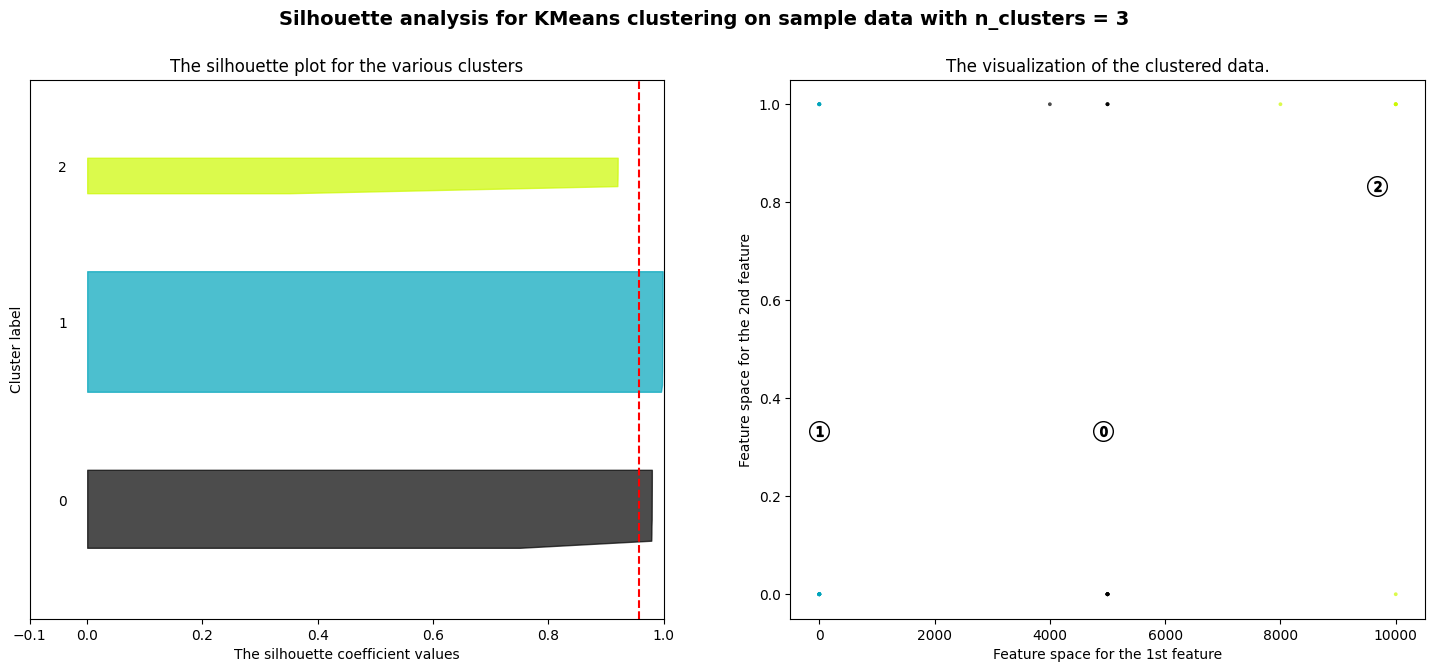

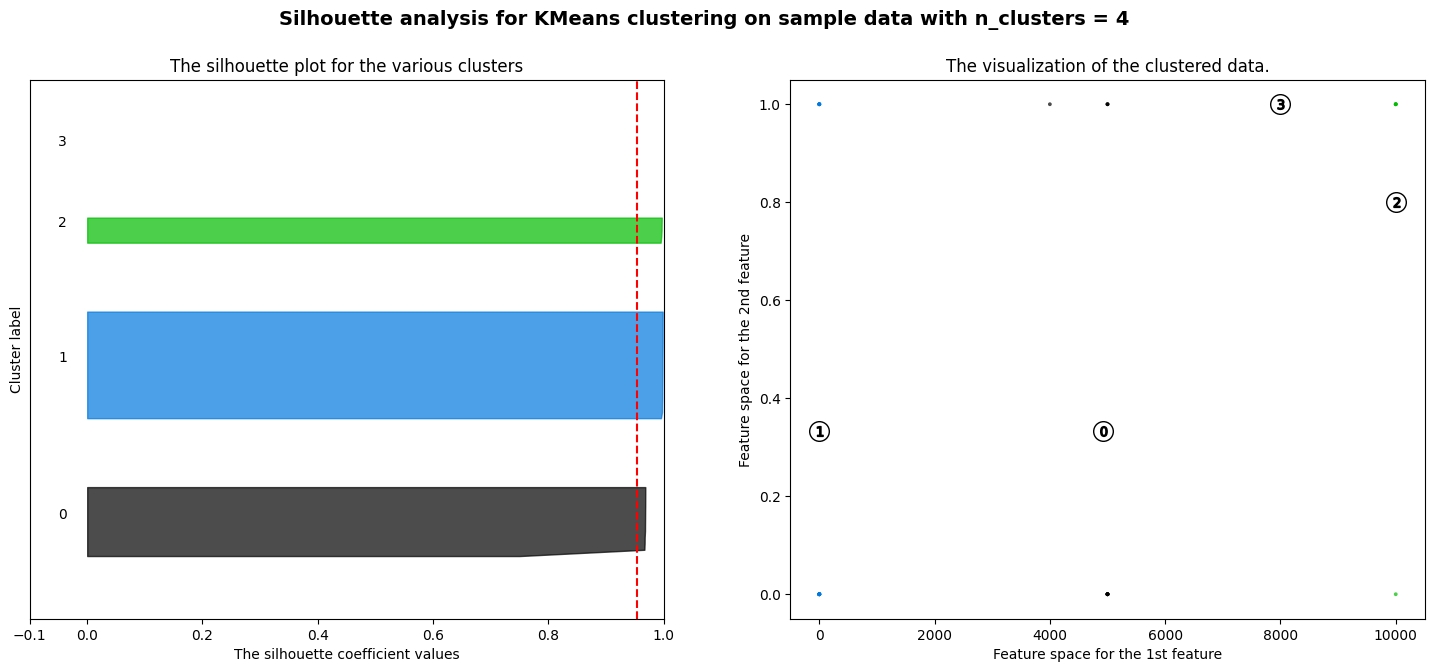

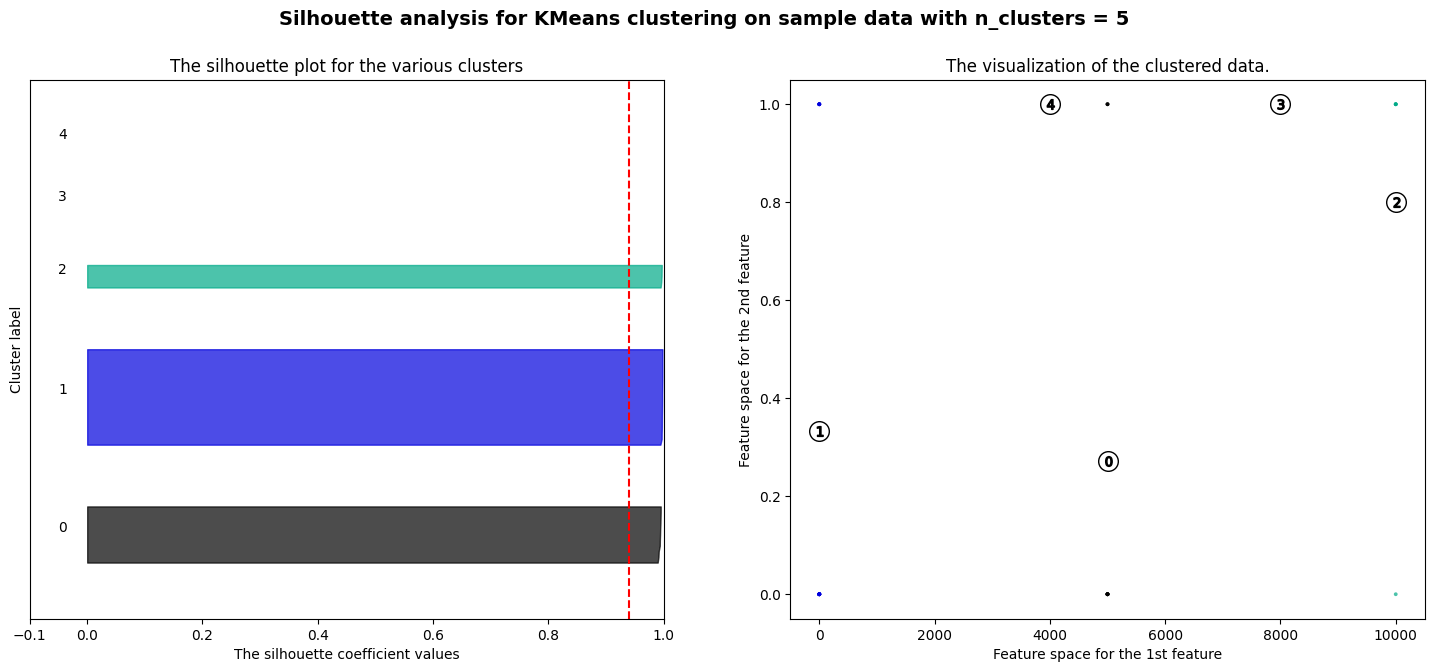

In [25]:
X = values
range_n_clusters = np.arange(2, 6)
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [26]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

KMeans(n_clusters=3)

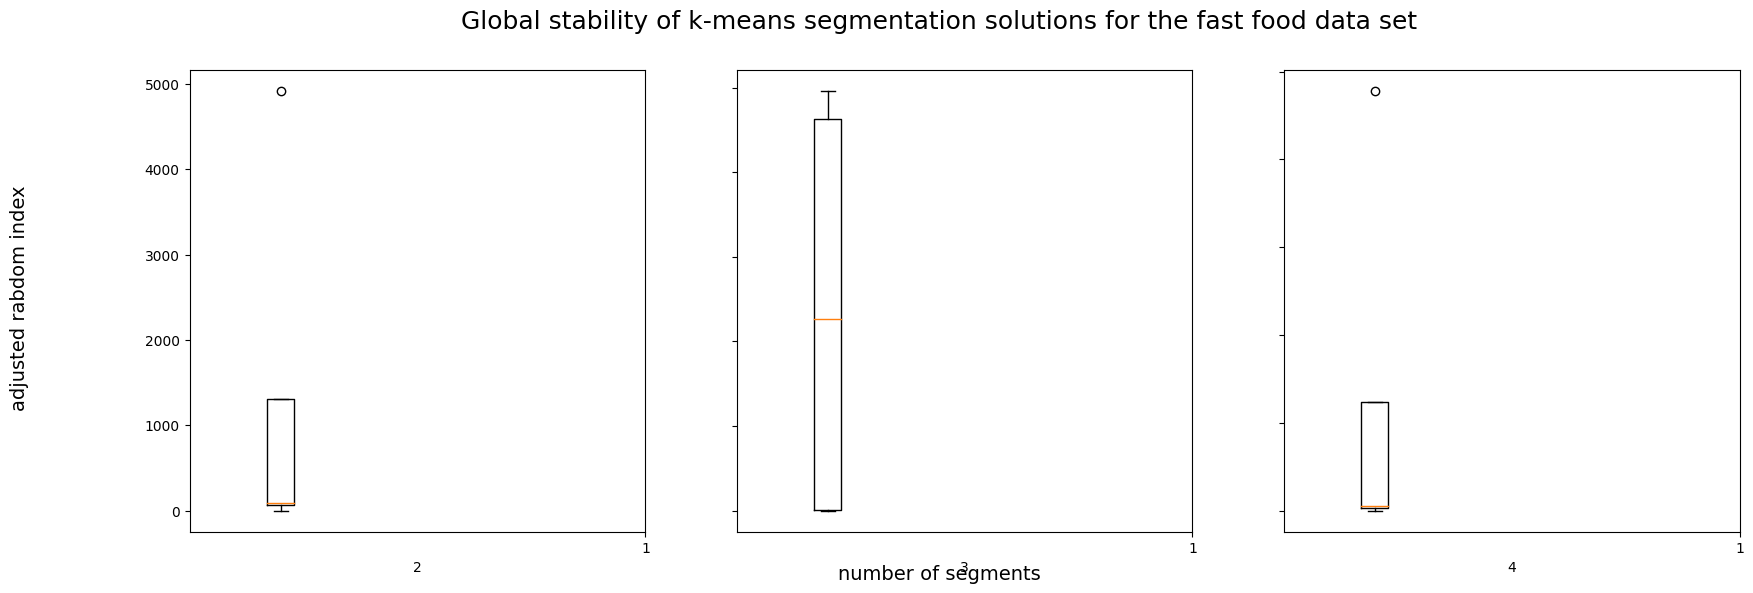

In [27]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the fast food data set', fontsize=18)

i=0

for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

Mixtures of Regression Models

In [28]:
target = df['EV'].values
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 6):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))


For K : 2 	 convergence after: 10 iterations 
 

For K : 3 	 convergence after: 10 iterations 
 

For K : 4 	 convergence after: 10 iterations 
 

For K : 5 	 convergence after: 11 iterations 
 



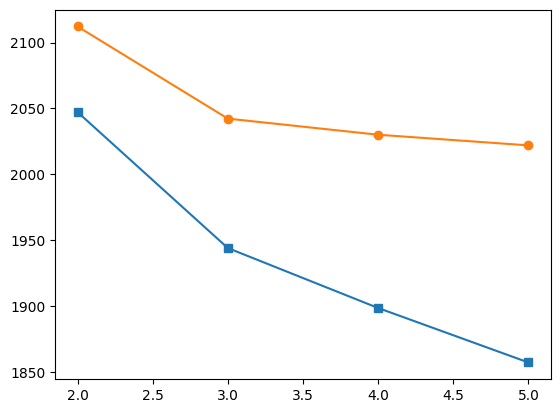

In [29]:

plt.plot(np.arange(2, 6), aic, marker = 's')
plt.plot(np.arange(2, 6), bic, marker = 'o')


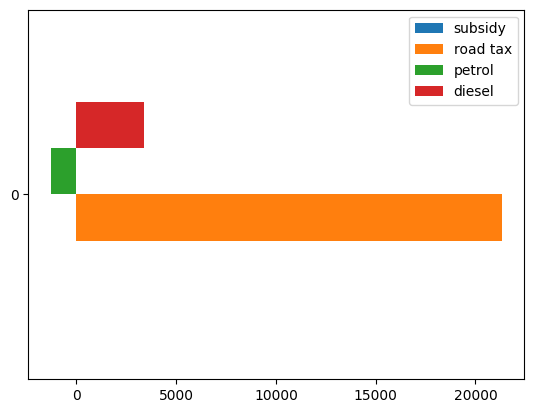

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr=lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()


Step-6

<Axes: xlabel='diesel', ylabel='EV'>

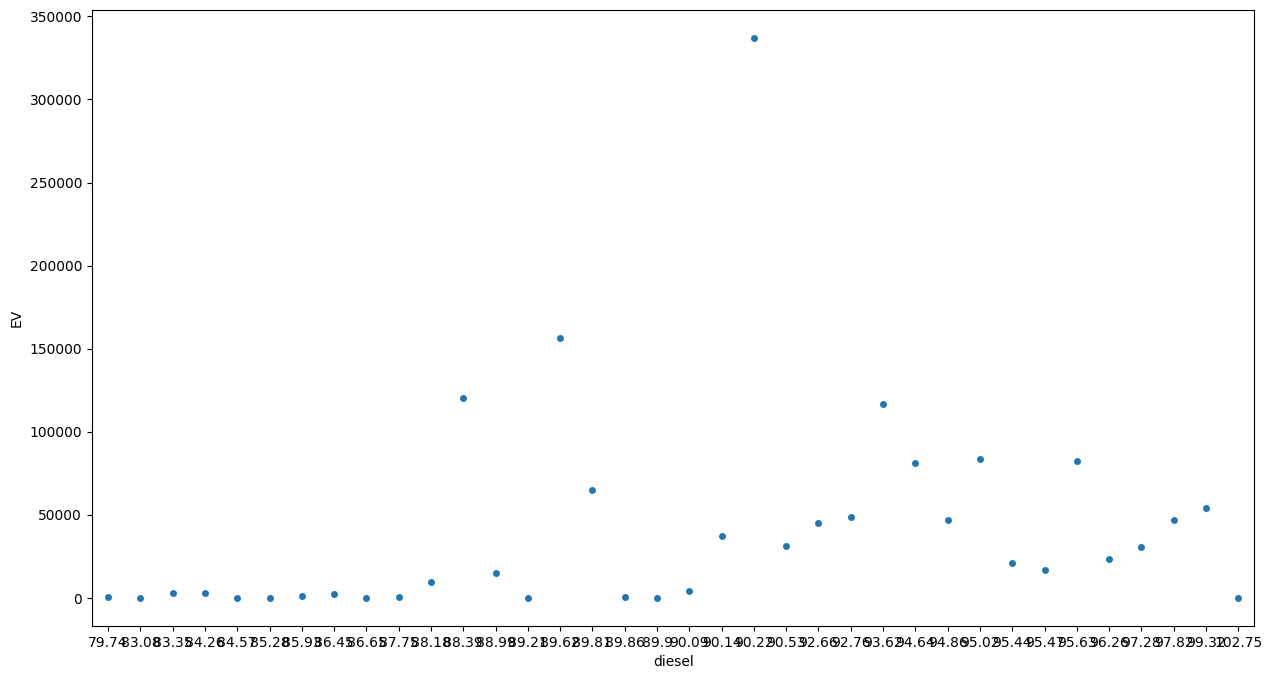

In [31]:
import seaborn as sb
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='diesel', y='EV', data=df, jitter=True)

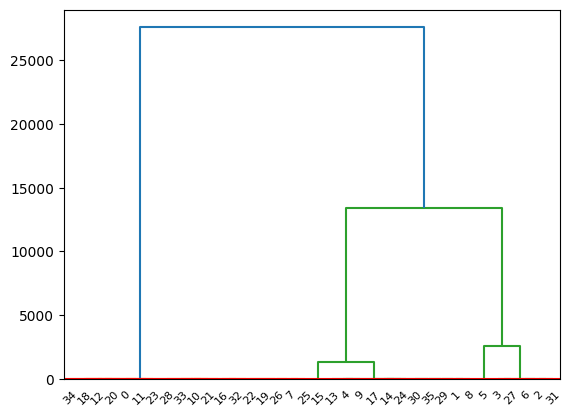

In [32]:
import scipy.cluster.hierarchy as shc
values = df[columns].values.astype(int)
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 5, color = 'r', linestyle = '-')
plt.show()

Number of clusters: 17


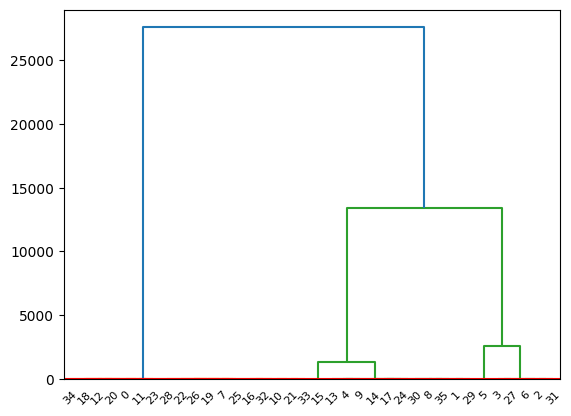

In [33]:
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data =data2

# Define the columns to use for clustering
columns = ['subsidy', 'road tax', 'petrol', 'diesel']

# Extract the values of the specified columns
values = data[columns].values

# Create a dendrogram plot using the ward linkage method
dend = shc.dendrogram(shc.linkage(values, method='ward'))

# Draw a horizontal line at y=5
plt.axhline(y=5, color='r', linestyle='-')

# Count the number of vertical lines that intersect the horizontal line
n_clusters = len([d for d in dend['dcoord'] if d[1] > 5])

# Print the number of clusters
print(f'Number of clusters: {n_clusters}')

# Show the plot
plt.show()


Number of clusters given by dendograms is 17

In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

array([1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2], dtype=int64)

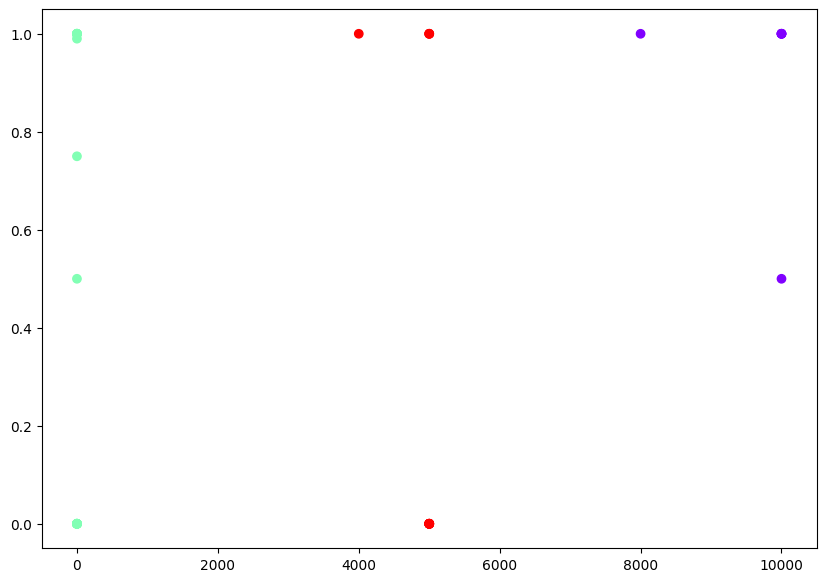

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')


Step-7

In [36]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(3, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

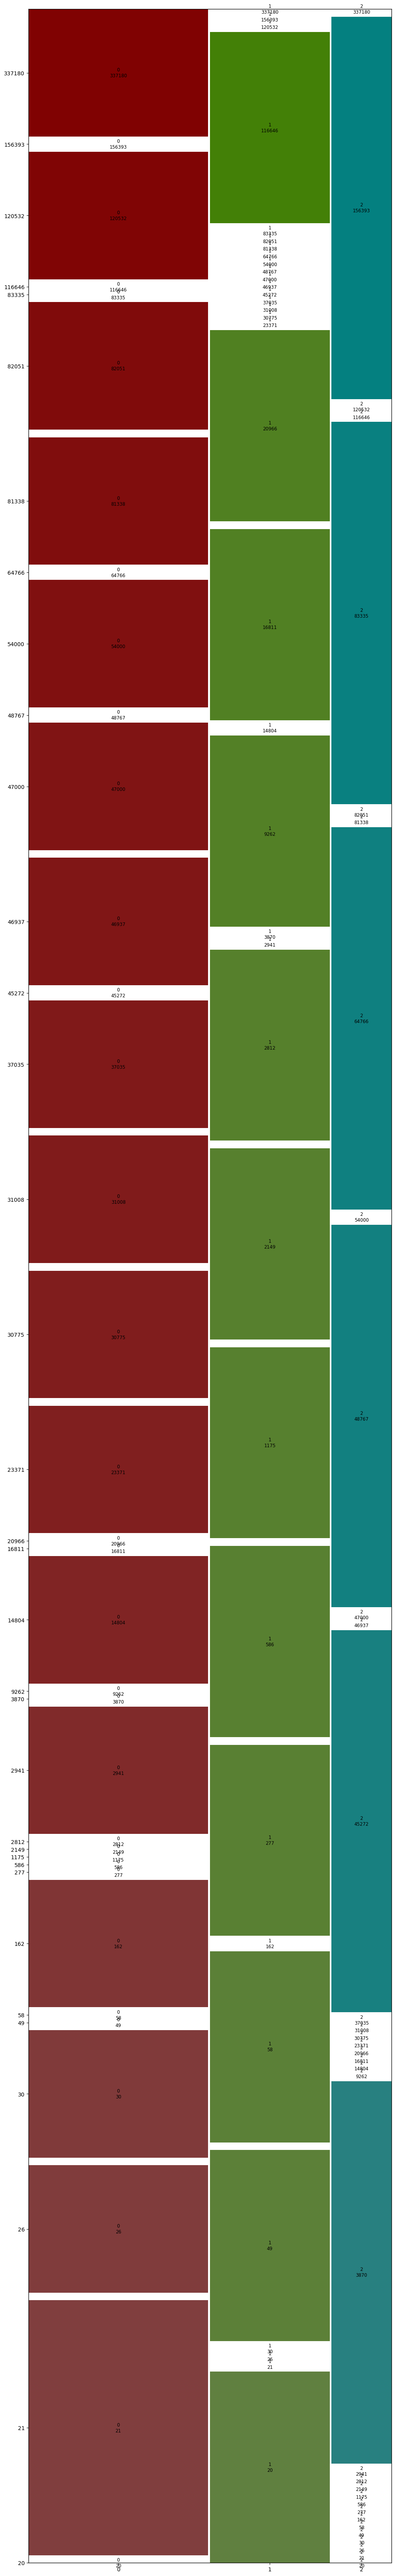

In [37]:
fig, ax = plt.subplots(figsize=(12, 85))
mosaic(crosstabLike.stack(), ax=ax)
plt.show()

Step-8

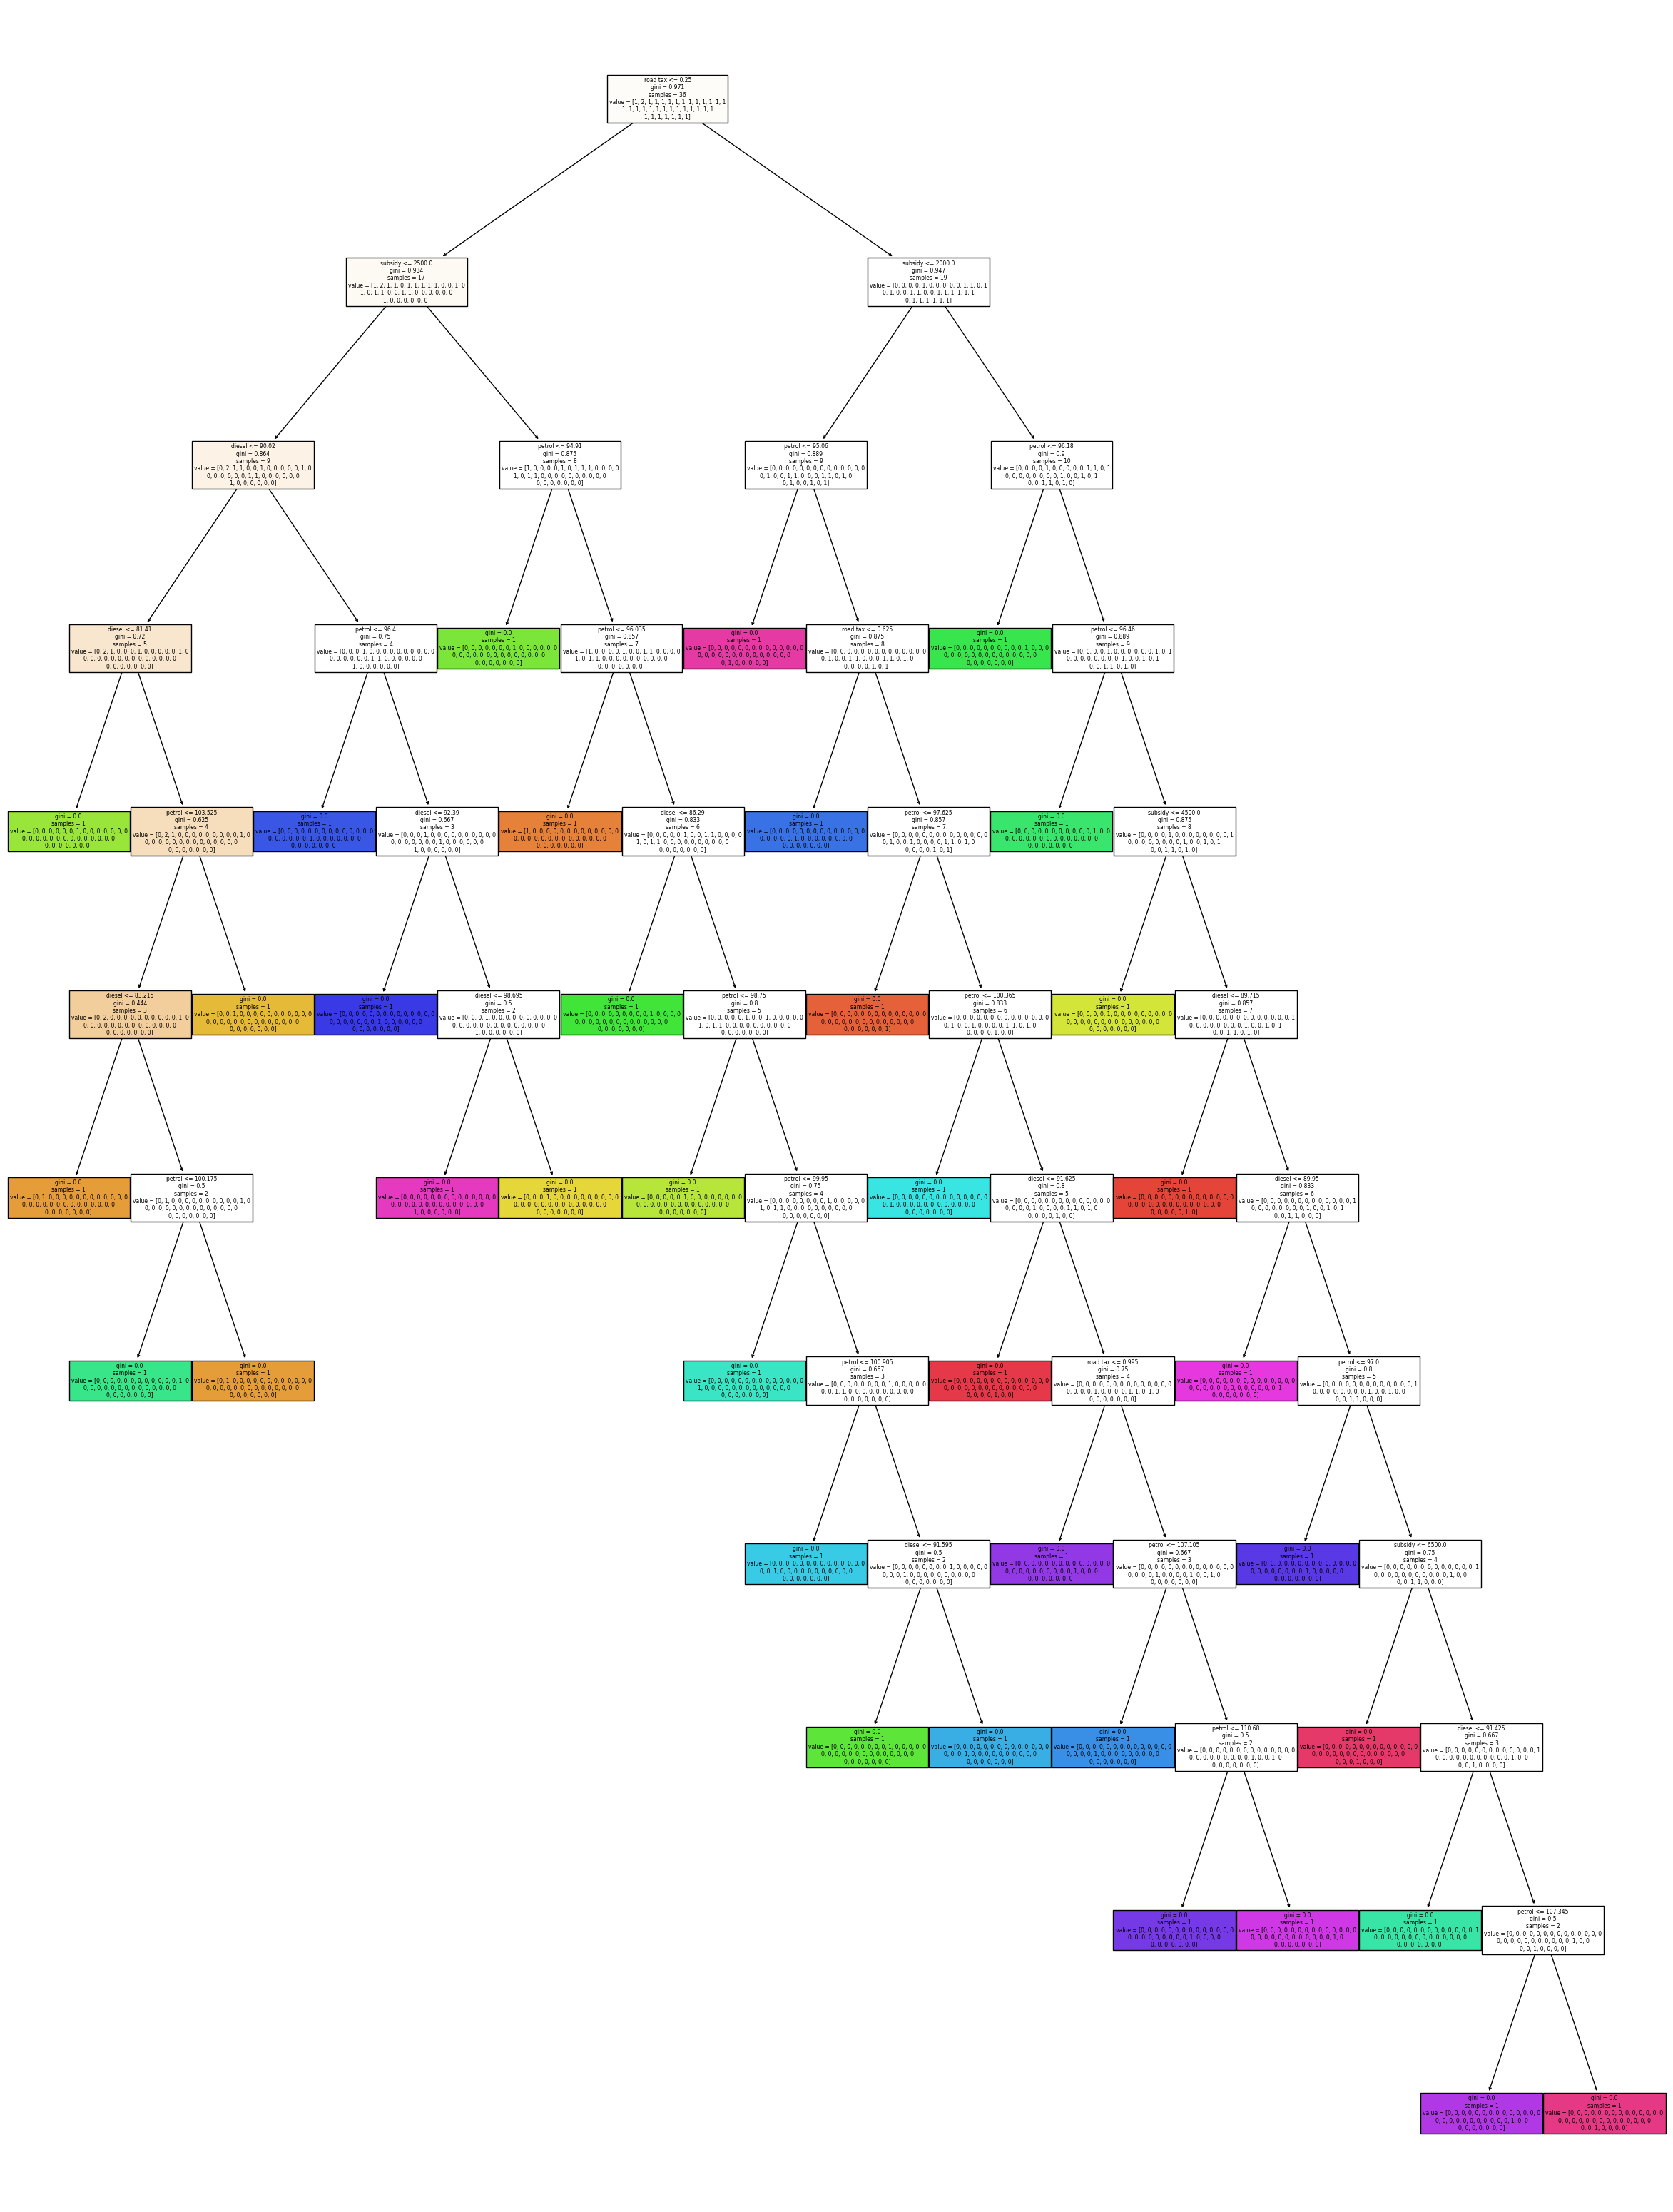

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(values, target)



fig = plt.figure(figsize=(30,40))
_ = plot_tree(dtree, 
                   feature_names=columns,  
                   filled=True)

In [39]:
df['KmeansLabels'] = kmeans.labels_

In [40]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
columns = df.columns[-4:-2].values
df[columns] = ordinal.fit_transform(df[columns])

In [41]:
subsidy= df.groupby('KmeansLabels')['subsidy'].mean()
subsidy = subsidy.to_frame().reset_index()

Diesel = df.groupby('KmeansLabels')['diesel'].mean()
Diesel = Diesel.to_frame().reset_index()

road_tax = df.groupby('KmeansLabels')['road tax'].mean()
road_tax = road_tax.to_frame().reset_index()

petrol = df.groupby('KmeansLabels')['petrol'].mean()
petrol = petrol.to_frame().reset_index()

EV = df.groupby('KmeansLabels')['EV'].mean()
EV = EV.to_frame().reset_index()

In [42]:
segmentEvalplot = EV.merge(subsidy, on='KmeansLabels', how='left').merge(petrol, on='KmeansLabels', how='left').merge(road_tax,on='KmeansLabels', how='left').merge(Diesel,on='KmeansLabels', how='left')

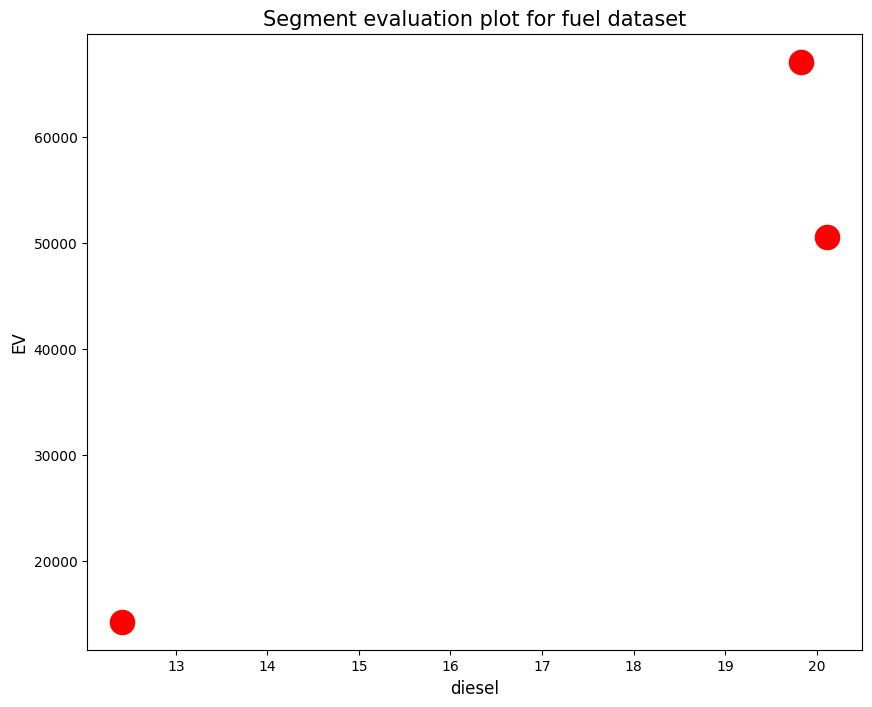

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "diesel", y = "EV",data=segmentEvalplot,s=400, color="r")
plt.title("Segment evaluation plot for fuel dataset", fontsize = 15) 
plt.xlabel("diesel", fontsize = 12) 
plt.ylabel("EV", fontsize = 12) 
plt.show()

In [44]:
# To Change back the encodings
df['diesel'] = df['diesel'].map(lambda x: ordinal.categories_[0][int(x)])